## Previous Notebook in this Project: [01_Data_Cleaning](https://github.com/omi-singh17/Cardio-Disease-Prediction/blob/main/01%20Data%20Cleaning/01_Data_Cleaning.ipynb "Pulling and Cleaning data from CDC website")


# 02_Exploratory_Data_Analysis

The main goal of EDA is to summarize and visualize data to gain valuable intuition and understanding of large data. 

 We have approached it in 4 parts: 
 - Statistical Summary
 - Numerical Features
 - Categorical Features
 - Correlations

# Imports

In [247]:
# imports
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

import os

# 1 Data Load and Statistical Summary

In [248]:
cvd = pd.read_csv('../clean data/cvd_clean.csv')

In [249]:
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34022 entries, 0 to 34021
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      34022 non-null  float64
 1   age                         34022 non-null  float64
 2   ethnicity                   34022 non-null  float64
 3   income                      34022 non-null  float64
 4   household_size              34022 non-null  float64
 5   marital_status              34022 non-null  float64
 6   bp_regularity               34022 non-null  float64
 7   systolic_bp                 34022 non-null  float64
 8   diastolic_bp                34022 non-null  float64
 9   bmi                         34022 non-null  float64
 10  waist_size                  34022 non-null  float64
 11  good_cholestrol             34022 non-null  float64
 12  body_fat                    34022 non-null  float64
 13  total_cholestrol            340

In [250]:
cvd.describe()
#when it comes to smoking, people who never started smoking have -99 as 'not applicable' for features like quitting smoking etc.
#we see this impacting statistical summary and in further visualization we have not include -99 for insights

,gender,age,ethnicity,income,household_size,marital_status,bp_regularity,systolic_bp,diastolic_bp,bmi,...,diabetes_diagnosis,diabetes_diagnosis_age,kidney_fail,fam_heart_issues,cig_smoker,cig_quit,heart_issue,cig_quit_days_clean,bad_cholestrol,missing_body_fat_indicator
count,34022.000000,34022.000000,34022.000000,34022.000000,34022.000000,34022.000000,34022.000000,34022.000000,3.402200e+04,34022.000000,...,34022.000000,34022.000000,34022.000000,34022.000000,34022.000000,34022.000000,34022.000000,34022.000000,34022.000000,34022.000000
mean,1.516137,49.362971,3.001029,8.004615,3.181941,2.524690,1.026101,124.094880,7.005432e+01,29.004501,...,1.897125,-80.352360,1.967962,2.061519,1.552290,-53.711510,1.889571,1462.052084,140.409147,0.567662
std,0.499747,18.010393,1.165439,4.302433,1.685144,1.841032,0.159437,17.972147,1.232236e+01,6.730900,...,0.367067,50.923561,0.176104,1.177224,0.497266,50.305251,0.313428,3794.146638,40.366879,0.495408
min,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,66.000000,5.397605e-79,13.180000,...,1.000000,-99.000000,1.000000,1.000000,1.000000,-99.000000,1.000000,-99.000000,23.000000,0.000000
25%,1.000000,34.000000,2.000000,5.000000,2.000000,1.000000,1.000000,114.000000,6.400000e+01,24.500000,...,2.000000,-99.000000,2.000000,2.000000,1.000000,-99.000000,2.000000,-99.000000,114.000000,0.000000
50%,2.000000,49.000000,3.000000,7.000000,3.000000,1.000000,1.000000,122.000000,7.000000e+01,27.950000,...,2.000000,-99.000000,2.000000,2.000000,2.000000,-99.000000,2.000000,-99.000000,137.000000,1.000000
75%,2.000000,64.000000,4.000000,12.000000,4.000000,5.000000,1.000000,132.000000,7.600000e+01,32.110000,...,2.000000,-99.000000,2.000000,2.000000,2.000000,2.000000,2.000000,-99.000000,162.000000,1.000000
max,2.000000,85.000000,5.000000,15.000000,7.000000,6.000000,2.000000,270.000000,1.340000e+02,130.210000,...,3.000000,666.000000,2.000000,9.000000,2.000000,3.000000,2.000000,26280.000000,754.000000,1.000000


In [251]:
#the average age of our particpants is around 50

In [252]:
cvd.head()

,gender,age,ethnicity,income,household_size,marital_status,bp_regularity,systolic_bp,diastolic_bp,bmi,...,diabetes_diagnosis,diabetes_diagnosis_age,kidney_fail,fam_heart_issues,cig_smoker,cig_quit,heart_issue,cig_quit_days_clean,bad_cholestrol,missing_body_fat_indicator
0,2.0,85.0,3.0,4.0,1.0,2.0,1.0,118.0,68.0,28.28,...,2.0,-99.0,2.0,2.0,2.0,-99.0,2.0,-99.0,135.0,1.0
1,2.0,44.0,4.0,11.0,4.0,1.0,1.0,144.0,74.0,30.90,...,2.0,-99.0,2.0,1.0,2.0,-99.0,1.0,-99.0,66.0,0.0
2,1.0,70.0,3.0,11.0,2.0,1.0,1.0,138.0,60.0,24.74,...,1.0,63.0,2.0,2.0,2.0,-99.0,2.0,-99.0,88.0,0.0
3,1.0,73.0,3.0,12.0,2.0,1.0,1.0,130.0,68.0,30.63,...,2.0,-99.0,2.0,2.0,2.0,-99.0,2.0,-99.0,137.0,0.0
4,2.0,41.0,4.0,7.0,1.0,5.0,1.0,118.0,68.0,28.28,...,2.0,-99.0,2.0,2.0,2.0,-99.0,2.0,-99.0,135.0,1.0


# 2 Numerical Features

In [253]:
numerical_features = ['age','systolic_bp', 'diastolic_bp', 'bmi', 'waist_size','good_cholestrol', 'body_fat' ,'total_cholestrol', 'diabetes_diagnosis_age', 'cig_quit_days_clean','bad_cholestrol']

In [254]:
#numerical_features = cvd[['systolic_bp', 'diastolic_bp', 'bmi', 'waist_size','good_cholestrol', 'body_fat' ,'total_cholestrol', 'diabetes_diagnosis_age', 'cig_quit_days_clean','bad_cholestrol']]

In [255]:
cvd[numerical_features].describe()

,age,systolic_bp,diastolic_bp,bmi,waist_size,good_cholestrol,body_fat,total_cholestrol,diabetes_diagnosis_age,cig_quit_days_clean,bad_cholestrol
count,34022.000000,34022.000000,3.402200e+04,34022.000000,34022.000000,34022.000000,34022.000000,34022.000000,34022.000000,34022.000000,34022.000000
mean,49.362971,124.094880,7.005432e+01,29.004501,98.875989,52.972782,115.585533,193.666921,-80.352360,1462.052084,140.409147
std,18.010393,17.972147,1.232236e+01,6.730900,15.450887,15.645203,74.057679,40.089263,50.923561,3794.146638,40.366879
min,20.000000,66.000000,5.397605e-79,13.180000,55.500000,6.000000,14.000000,59.000000,-99.000000,-99.000000,23.000000
25%,34.000000,114.000000,6.400000e+01,24.500000,88.700000,42.000000,99.000000,167.000000,-99.000000,-99.000000,114.000000
50%,49.000000,122.000000,7.000000e+01,27.950000,97.500000,51.000000,101.000000,191.000000,-99.000000,-99.000000,137.000000
75%,64.000000,132.000000,7.600000e+01,32.110000,107.200000,61.000000,111.000000,215.000000,-99.000000,-99.000000,162.000000
max,85.000000,270.000000,1.340000e+02,130.210000,178.200000,226.000000,4233.000000,813.000000,666.000000,26280.000000,754.000000


Text(-0.5, 3.5, 'Boxplot for all numerical features')

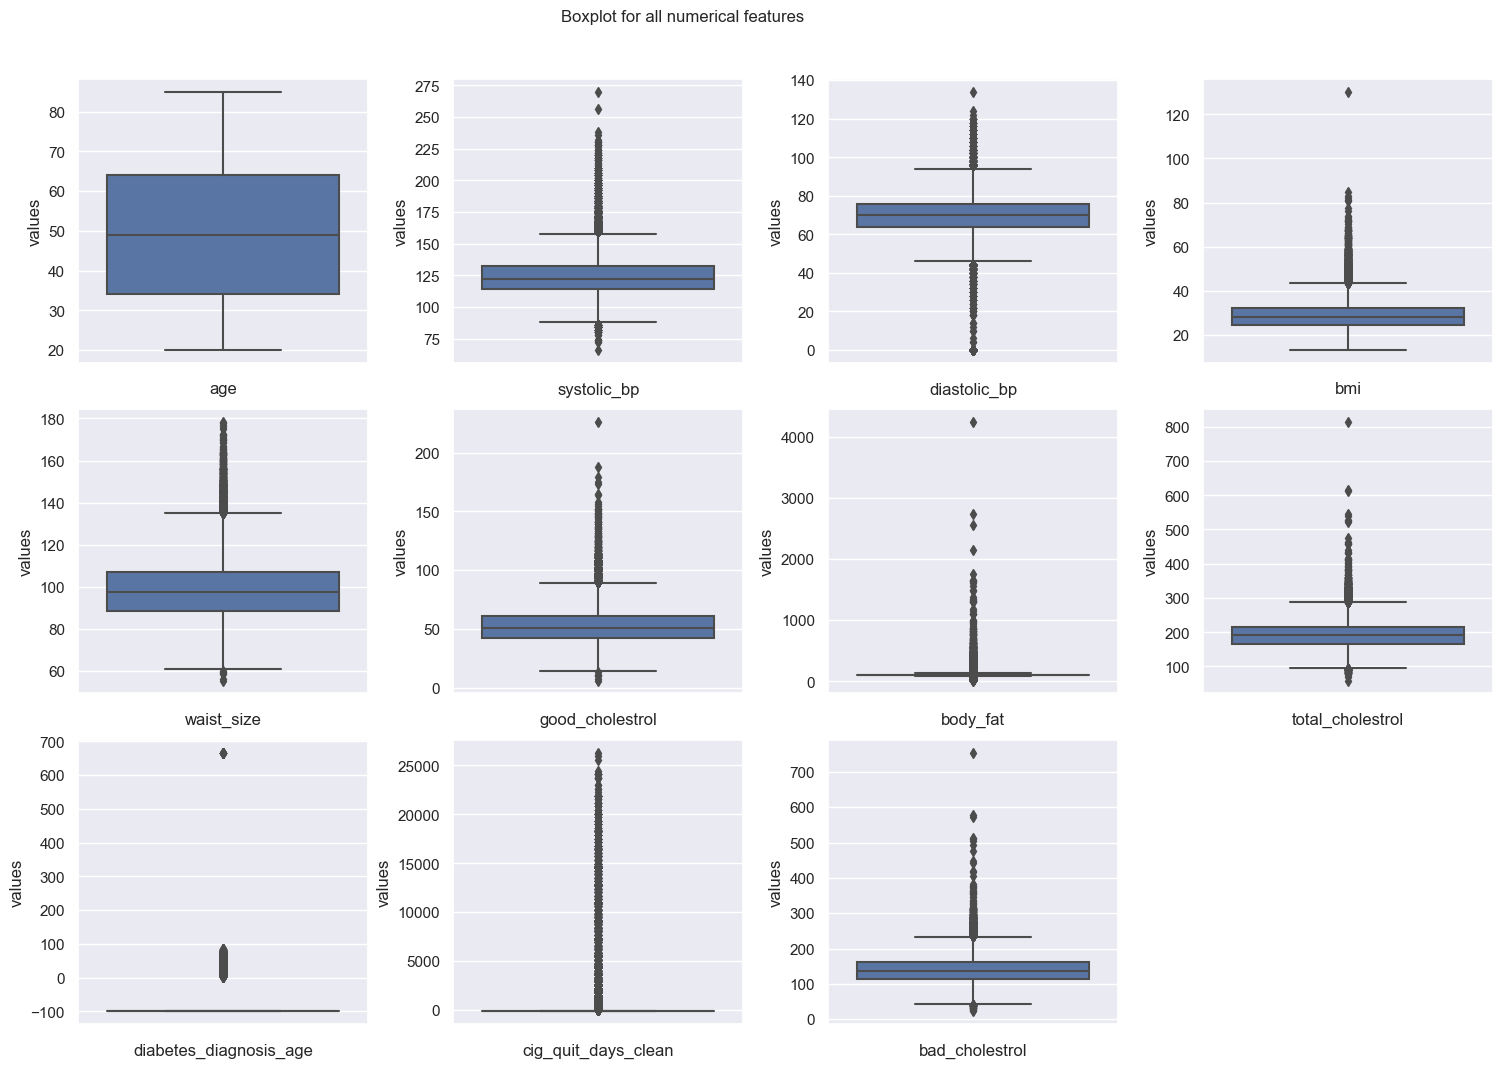

In [256]:
#Creating boxplot for all numerical features
plt.figure(figsize = (15,10))
for i in enumerate(numerical_features):
    plt.subplot(3, 4, i[0]+1)
    sns.boxplot(y = i[1], data = cvd)
    plt.tight_layout(pad=0.5)
    plt.gca().set(xlabel= i[1], ylabel='values')
plt.title('Boxplot for all numerical features', x=-0.5 ,y=3.5)    


In [257]:
#Looking at diabetes_diagnosis_age we see a value above 600, looking at data cleaning step we note that this represents person was under 1. Let's replace the value
cvd['diabetes_diagnosis_age'] = cvd['diabetes_diagnosis_age'].replace([666.0],0.0) #indicates person was less than 1

Takeways:

Range and number of outliers for all features is huge

Features body_fat, diabetes_diagnosis_age, cig_quit_days_clean seem to be greatly influenced by '-99' for Not applicable values. Also, due to degree of skewness a log scale might be a good fit for body fat.


Text(-0.5, 3.5, 'Boxplot for all numerical features after cleaning -99 values')

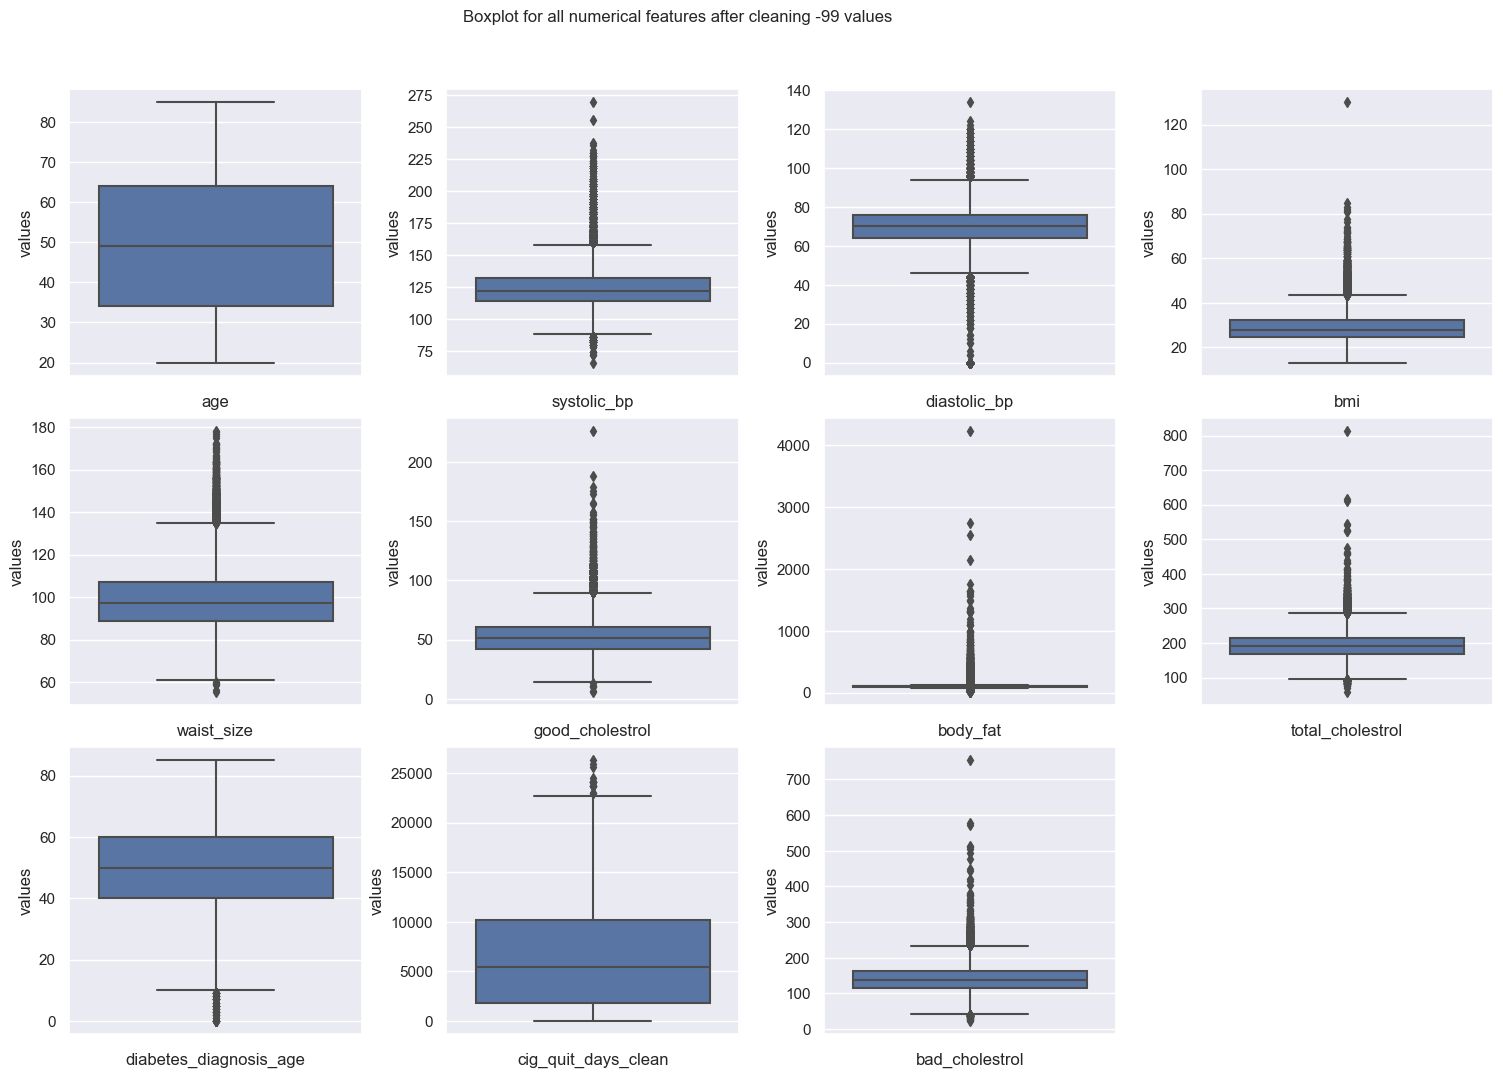

In [258]:
df=cvd.replace(-99, np.NaN) #creating a data frame without any -99 values

#creating boxplot for all numerical features after removing -99 values indicating not applicable
plt.figure(figsize = (15,10))
for i in enumerate(numerical_features):
    plt.subplot(3, 4, i[0]+1)
    sns.boxplot(y = i[1], data = df)
    plt.tight_layout(pad=0.5)
    plt.gca().set(xlabel= i[1], ylabel='values')
plt.title('Boxplot for all numerical features after cleaning -99 values', x=-0.5 ,y=3.5)        

Text(0.5, 1.0, 'Logscale Boxplot of body_fat')

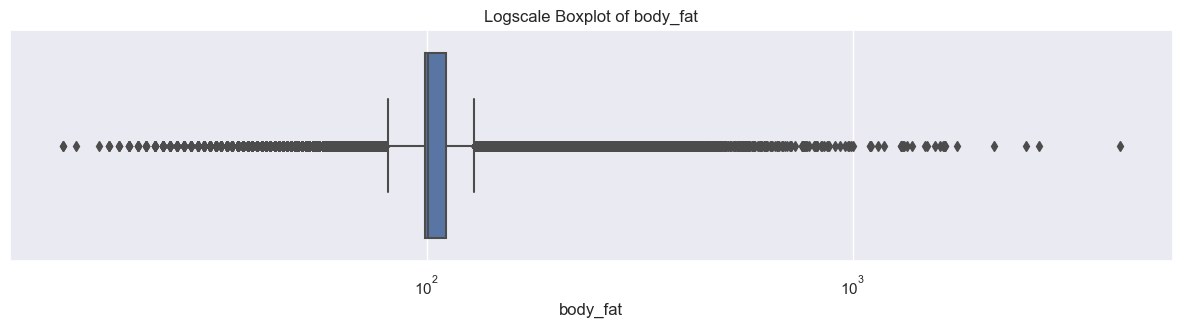

In [259]:
#creating a log scale box plot for body fat to understand spread of values
plt.figure(figsize = (15,3))
sns.boxplot(x=df['body_fat'], data=df)
plt.xscale("log")
plt.title("Logscale Boxplot of body_fat")

Text(-0.5, 3.5, 'Histplot for all numerical features')

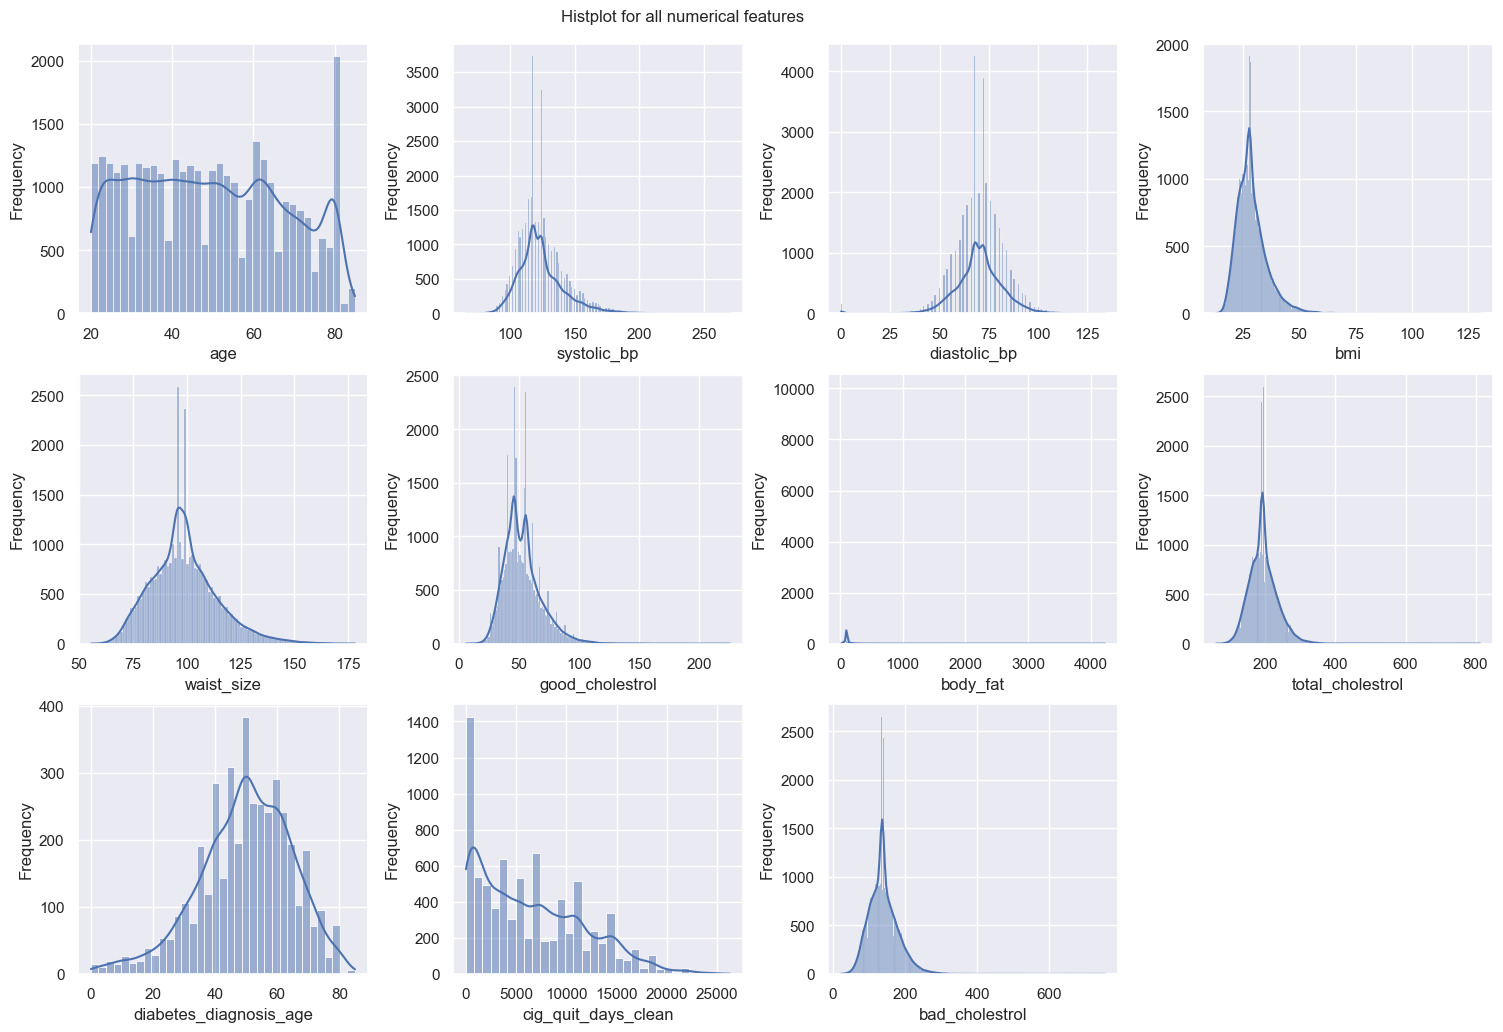

In [260]:
#Histogram with kernel density function of all numerical features to understand spread
plt.figure(figsize = (15,10))
for i in enumerate(numerical_features):
    plt.subplot(3, 4, i[0]+1)
    sns.histplot(x = i[1], data = df, kde=True)
    plt.tight_layout(pad=0.5)
    plt.gca().set(xlabel= i[1],ylabel='Frequency') 
plt.title('Histplot for all numerical features', x=-0.5 ,y=3.50)    

Numerical Features Takeaways: 

Refrencing the data cleaning step we notice that body_fat had around 56% of values as missing, the spread seems to be centered around a really small value, influnced by median

Cig_quit_days_clean has a left skewed data with fewer and fewer people having close to highest number of days since they stopped smoking


Finally, it stands out that the peak number of particpants in terms of age are around 80

# 3 Binary or Categorical Features

In [261]:
categorical_features = ['gender', 'ethnicity', 'income','household_size', 'marital_status', 'bp_regularity', 'diabetes_diagnosis','kidney_fail', 'fam_heart_issues', 'cig_smoker', 'cig_quit' ]

In [262]:
# checking total number of  features (24 minus heart issue and missing body fat indicator, means we have all 22 features accounted for)
print('Total numerical features are: ', cvd[numerical_features].shape[1])
print('Total categorical features are: ',  cvd[categorical_features].shape[1])

Total numerical features are:  11
Total categorical features are:  11


Text(0.5, 5.25, 'Countplot for all categorical features')

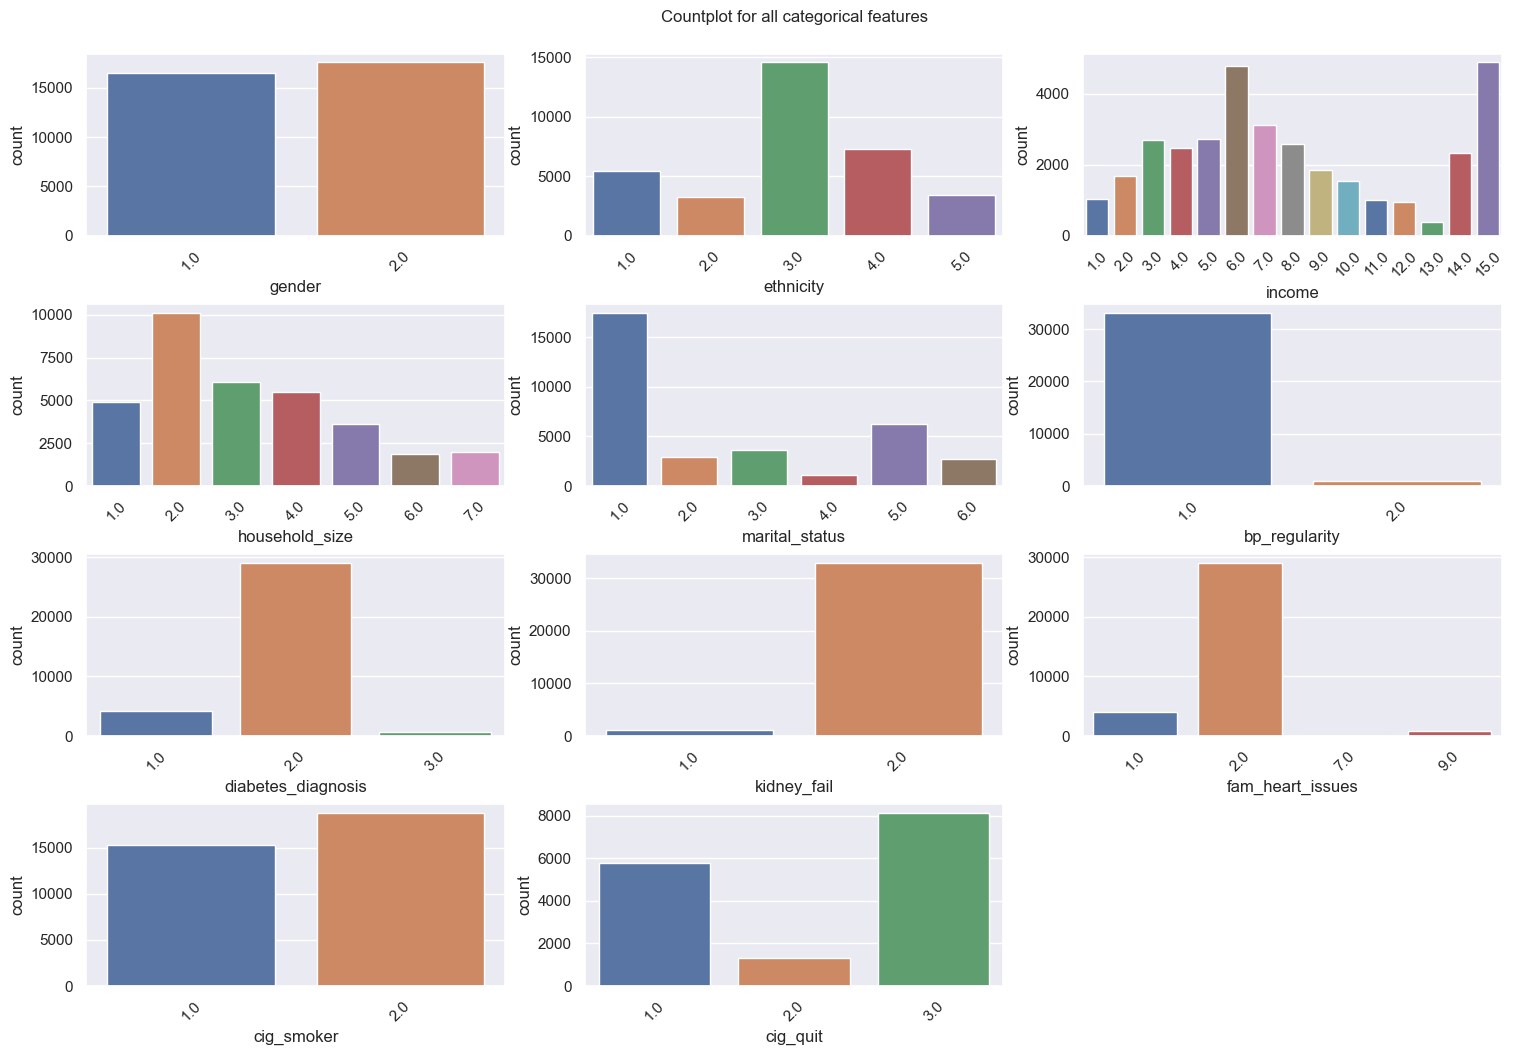

In [263]:
#count plot of all categorical variables
plt.figure(figsize = (15,10))
for i in enumerate(categorical_features):
    plt.subplot(4, 3, i[0]+1)
    sns.countplot(x = i[1], data = df, palette = 'deep' )
    plt.tight_layout(pad=0.2)
    plt.gca().set(xlabel= i[1],ylabel='count')
    plt.xticks(rotation = 45)
plt.title('Countplot for all categorical features' , x=0.5, y=5.25)

In [264]:
# we see that income has a lot of values, referencing the data cleaning step we note the mapping below

# cvd_raw['income'] = cvd_raw['income'].replace([1.0,2.0,3.0,4.0,13.0],'< 20,000')
# cvd_raw['income'] = cvd_raw['income'].replace([5.0,6.0,12.0],'20,000 to < 35,000')
# cvd_raw['income'] = cvd_raw['income'].replace([7.0,8.0,9.0],'35,000 to < 65,000')
# cvd_raw['income'] = cvd_raw['income'].replace([10.0,11.0,14.0],'65,000 to 100,000')
# cvd_raw['income'] = cvd_raw['income'].replace([15.0],'100,000 <')

Text(0.5, 2.2, 'Income count plot overall and based on gender (USD)')

<Figure size 1500x600 with 0 Axes>

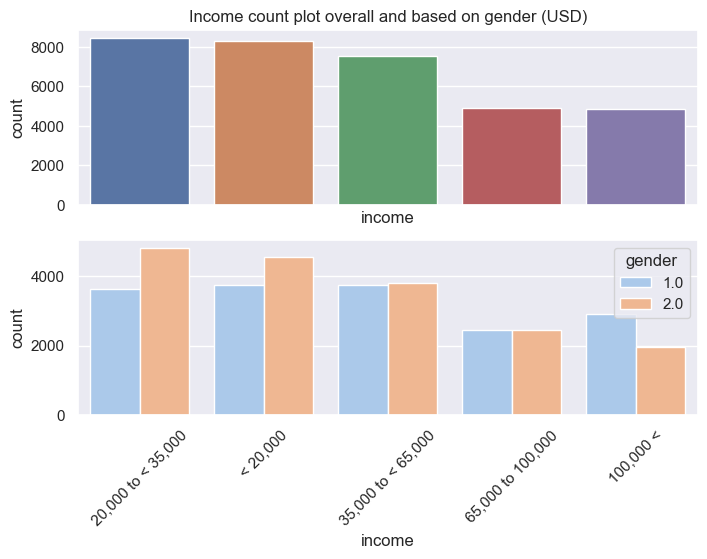

In [265]:
#update income values to actual range to get better idea of spread

temp = df.copy()
temp['income'] = temp['income'].replace([1.0,2.0,3.0,4.0,13.0],'< 20,000')
temp['income'] = temp['income'].replace([5.0,6.0,12.0],'20,000 to < 35,000')
temp['income'] = temp['income'].replace([7.0,8.0,9.0],'35,000 to < 65,000')
temp['income'] = temp['income'].replace([10.0,11.0,14.0],'65,000 to 100,000')
temp['income'] = temp['income'].replace([15.0],'100,000 <')

plt.figure(figsize = (15,6))
fig, ax =plt.subplots(2, sharex = True)
sns.countplot(ax = ax[0], x = 'income', data = temp, palette = 'deep' , order=temp['income'].value_counts().index)
sns.countplot(ax=ax[1], x = 'income', data = temp, palette='pastel' , order=temp['income'].value_counts().index , hue='gender')
plt.xticks(rotation = 45)
plt.title ('Income count plot overall and based on gender (USD)', x=0.5, y=2.2)

Takeways from categorical data:

While most plots makes sense, it is good to note that most of our paticpants martial status is 'Married', while the most common ethnicity is'Non-Hispanic White'

While men make up the bigger portion of highest income bracket, the difference isn't as huge as it felt during data cleaning step

# 4 Correlation

<Figure size 1500x5000 with 0 Axes>

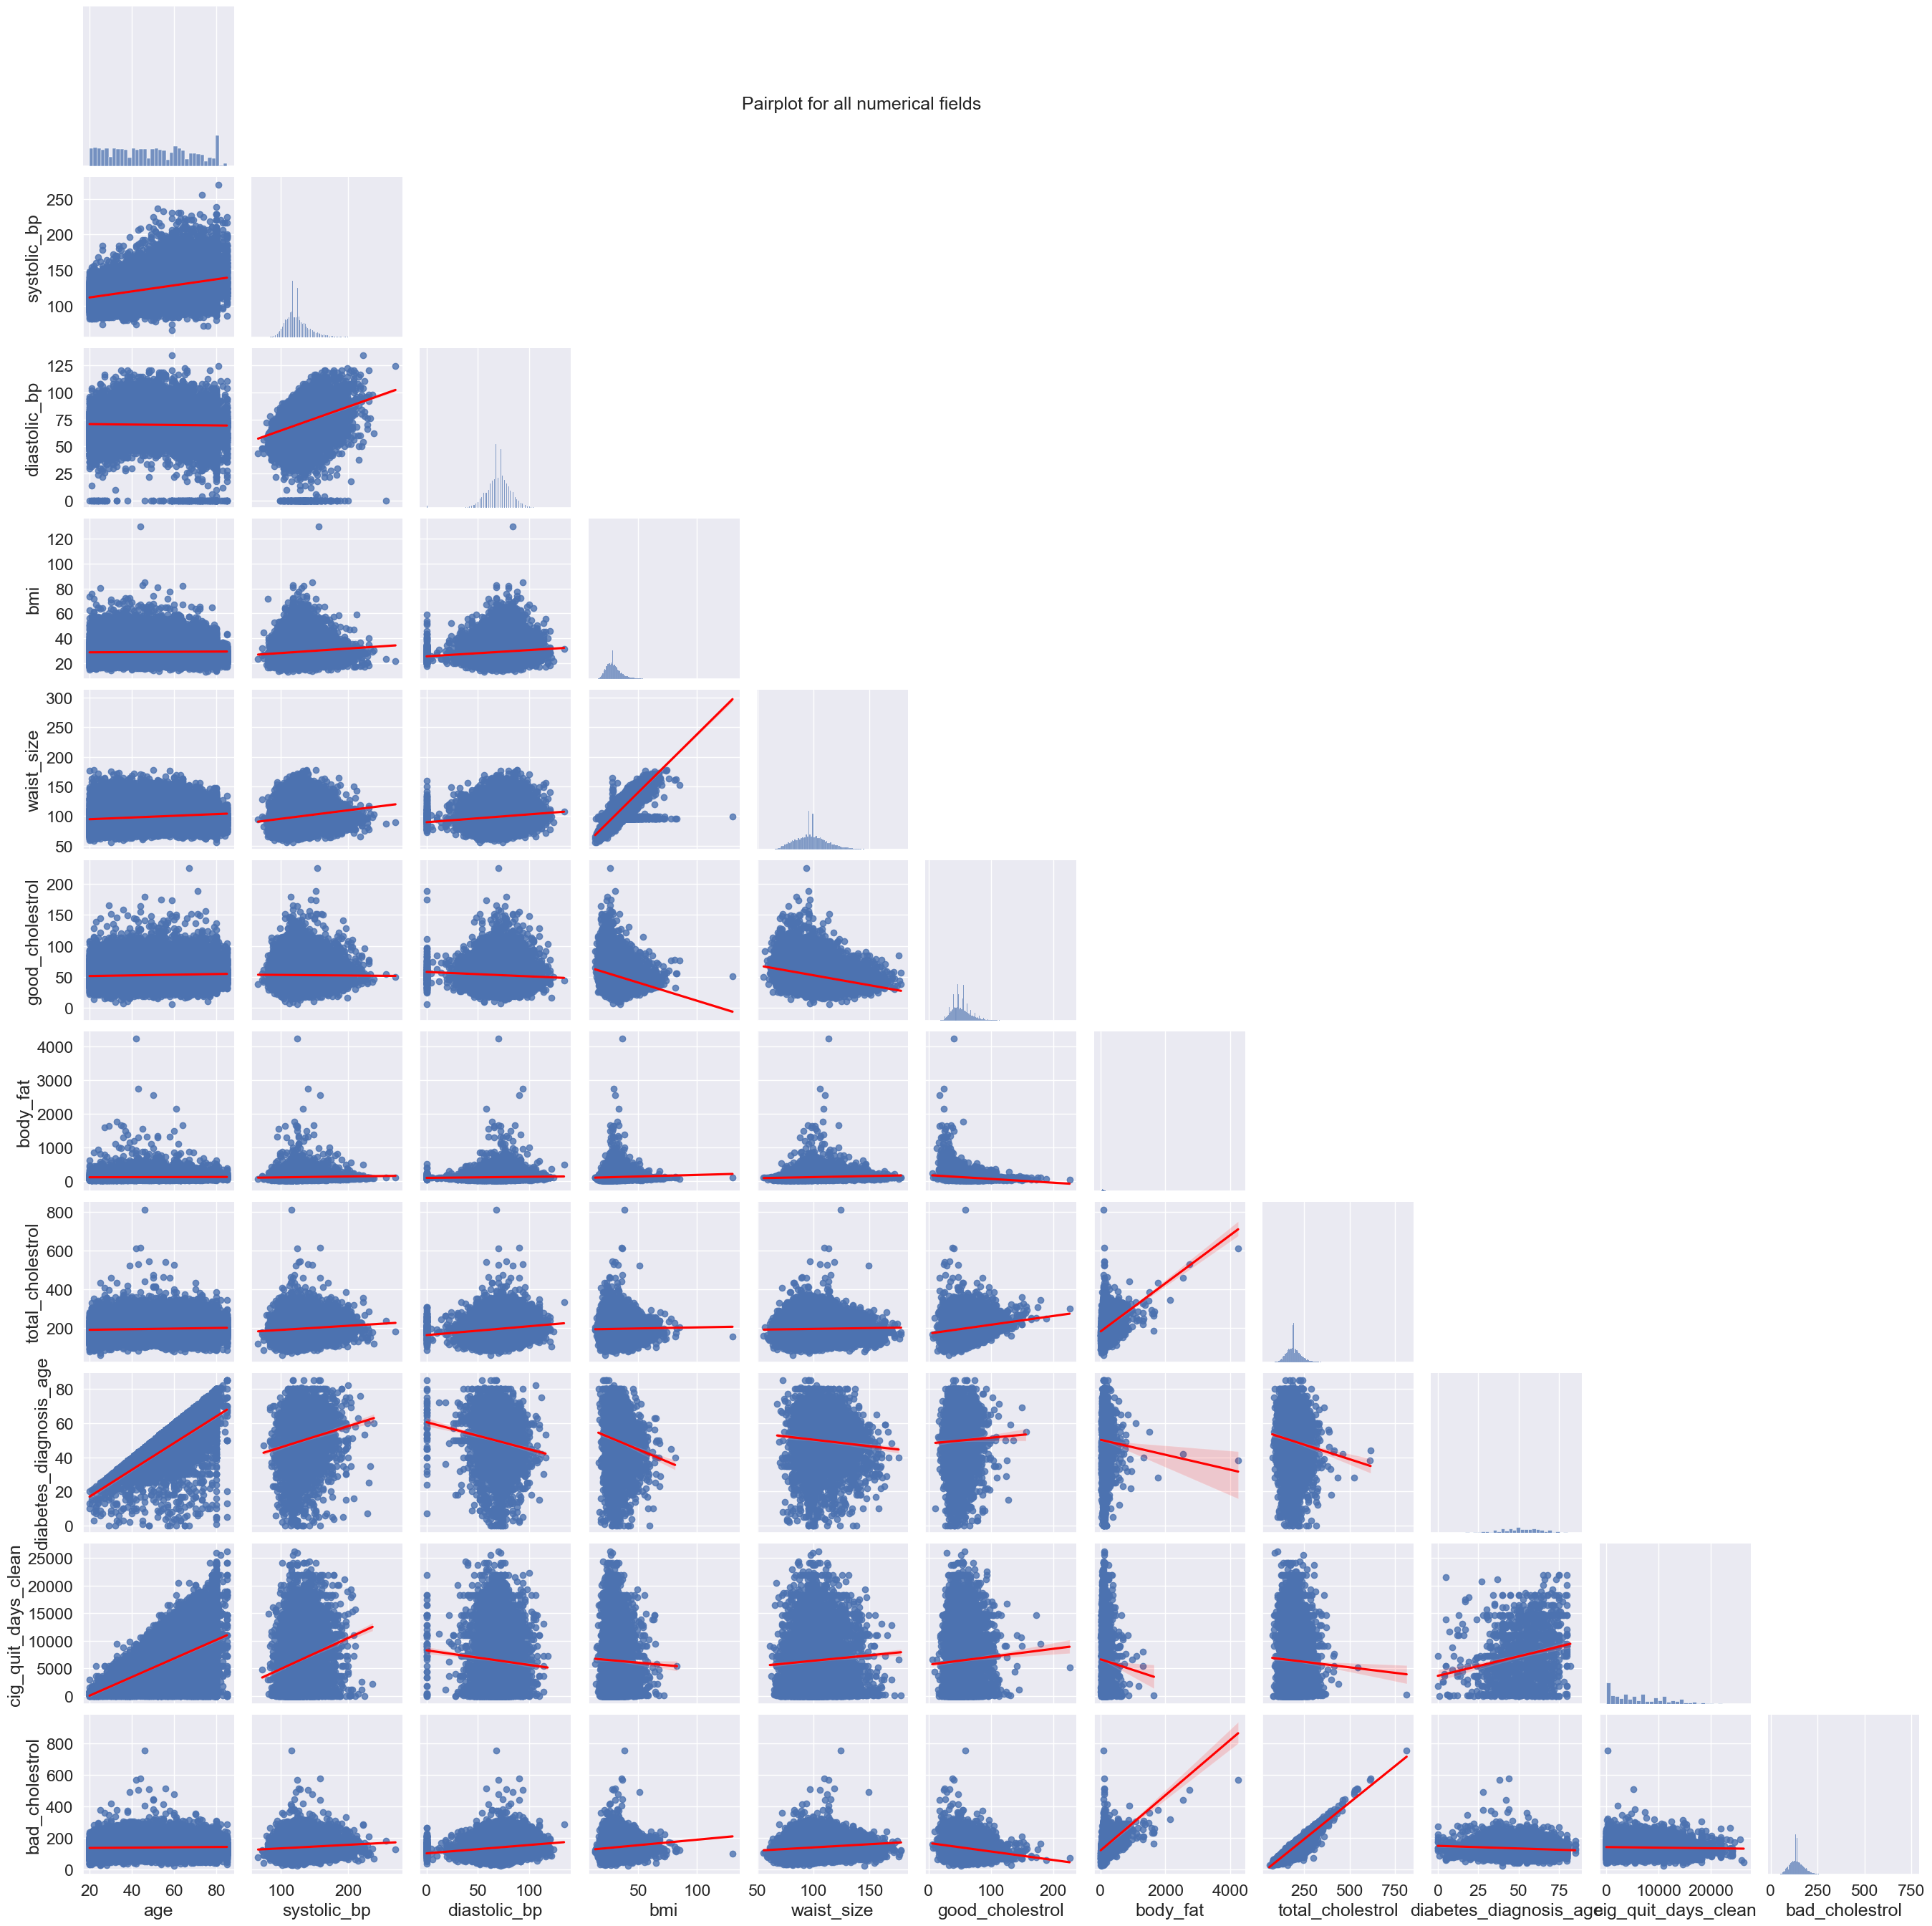

In [266]:
sns.set(font_scale=1.5)
# # Make a pairplot of all numerical features
plt.figure(figsize = (15,50))
sns.pairplot(df[numerical_features], kind = 'reg', plot_kws={'line_kws': {'color':'red'}}, corner = True)
#plt.xlabel('feature', fontsize=1.5)
#plt.xticks(rotation = 45)
plt.title('Pairplot for all numerical fields' , x=-6, y=11)

sns.set(font_scale=1.0)

Pairplot Takeaways

We see strong correlation between certain features like waist_size and bmi. Also total_cholestrol and bad_cholestrol seem to have strong correlation which makes sense.
Both have a strong correlation with body_fat as well, which is good news as we had around 56% of entries missing values

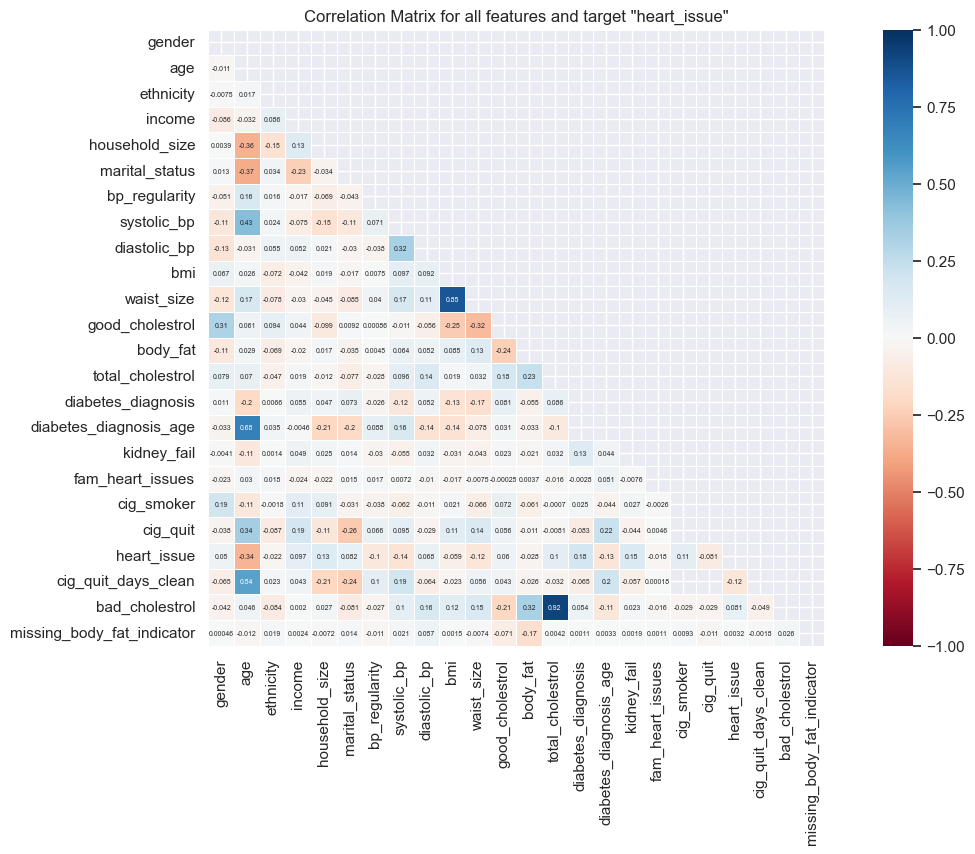

In [267]:
import warnings
warnings.simplefilter("ignore")

plt.figure(figsize = (15,8))
corr = df.corr()
# creating mask to hide top half of corr matrix
mask = np.triu(np.ones_like(corr))
sns.heatmap(data = corr, vmin = -1, vmax = 1, square = True, cmap = 'RdBu' , linewidths=.5, mask = mask, annot_kws = {'size':5}, annot = True)
plt.title('Correlation Matrix for all features and target "heart_issue"' , x=0.5, y=1)

warnings.resetwarnings()

Text(0.5, 1.0, 'Age Spread for Heart Issue Yes/No')

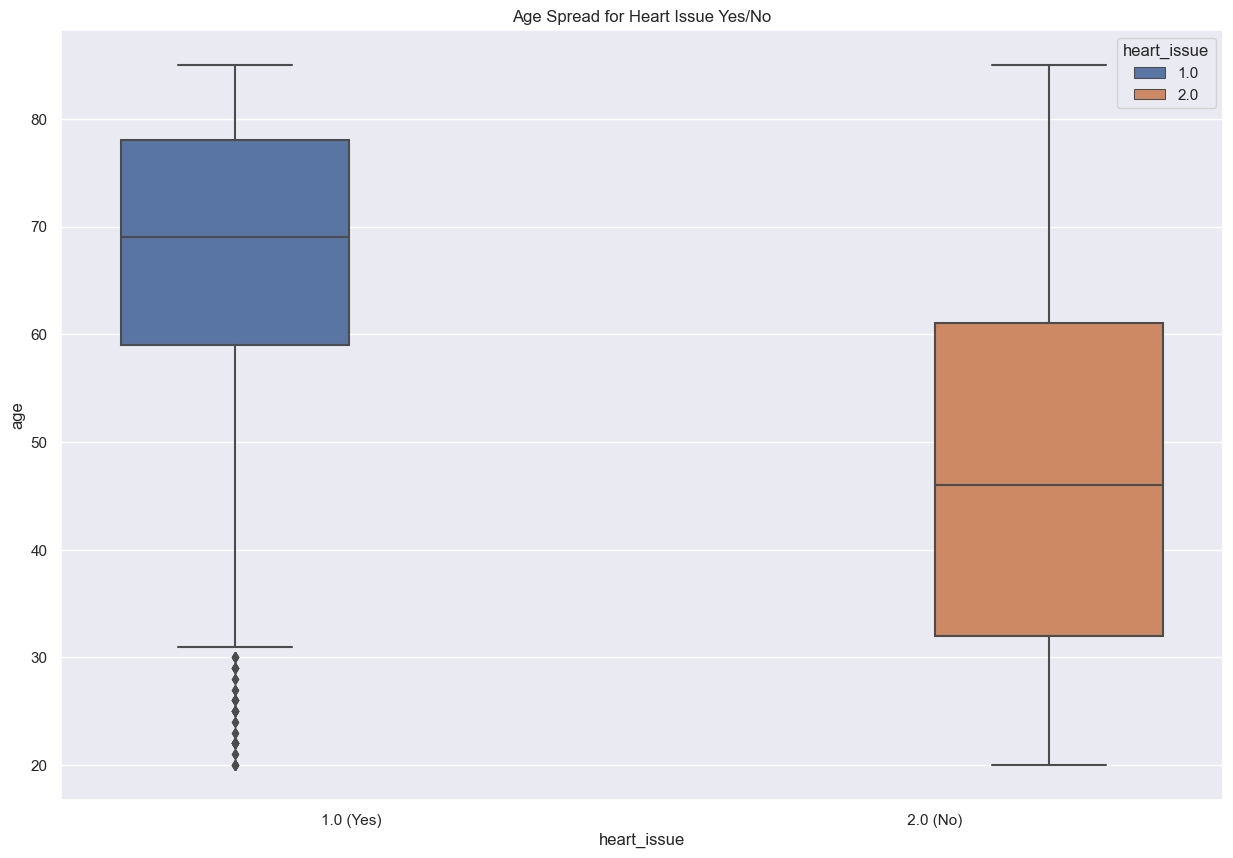

In [268]:
# We look at our target column heart_issue with age
plt.figure(figsize = (15,10))
ax = plt.axes() 
sns.boxplot(x=df['heart_issue'] , y=df['age'], data=df, hue = df['heart_issue'])
#ax.set_xticks(l)
ax.set_xticklabels(['1.0 (Yes)',' 2.0 (No)'])
#ax.legend(labels = ['Yes', 'No'])
plt.title("Age Spread for Heart Issue Yes/No")

# While there is a clear difference of 2 decades for folks with and without an heart issue. 
# The whiskers and outliers for people with heart issue does go down to younger ages, highlighting age is not the only factor.

Text(0, 3.5, 'Boxplot of numerical fields with respect to heart_issue')

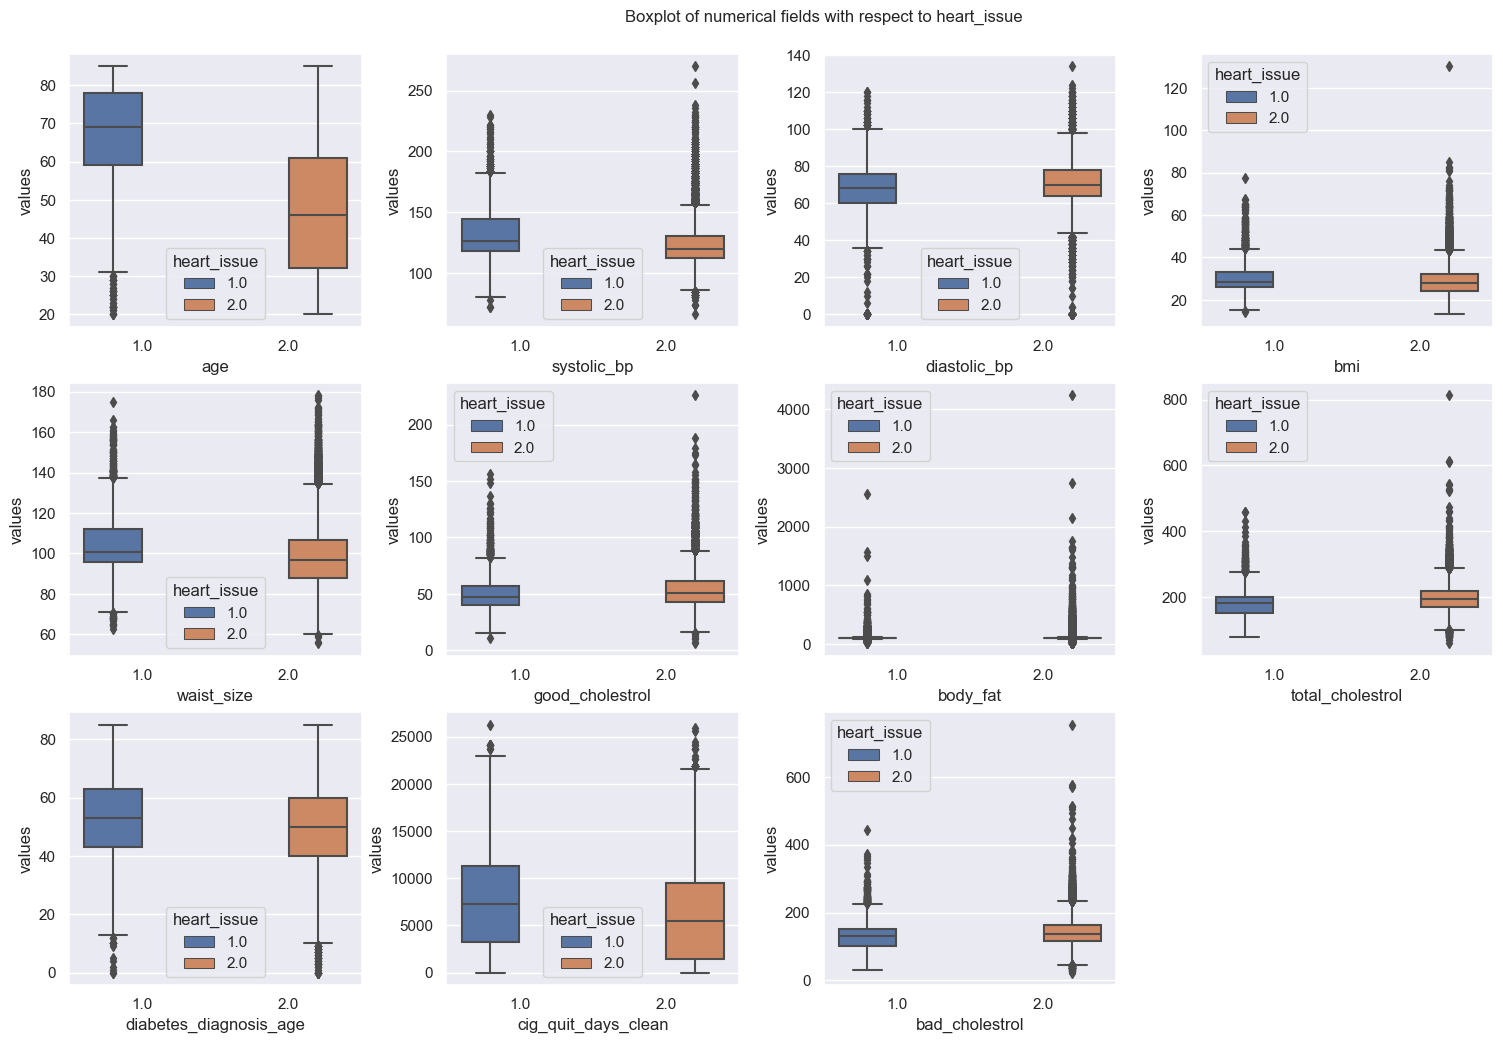

In [269]:
#let's look at box plot of our target feature with respect to all numerical features
plt.figure(figsize = (15,10))
for i in enumerate(numerical_features):
    plt.subplot(3, 4, i[0]+1)
    sns.boxplot(x=df['heart_issue'], y = i[1], data = df, hue = df['heart_issue'])
    plt.tight_layout(pad=0.5)
    plt.gca().set(xlabel= i[1], ylabel='values')
plt.title('Boxplot of numerical fields with respect to heart_issue' , x=0, y=3.5)

Text(0, 3.6, 'Countplot of categorical fields with respect to heart_issue')

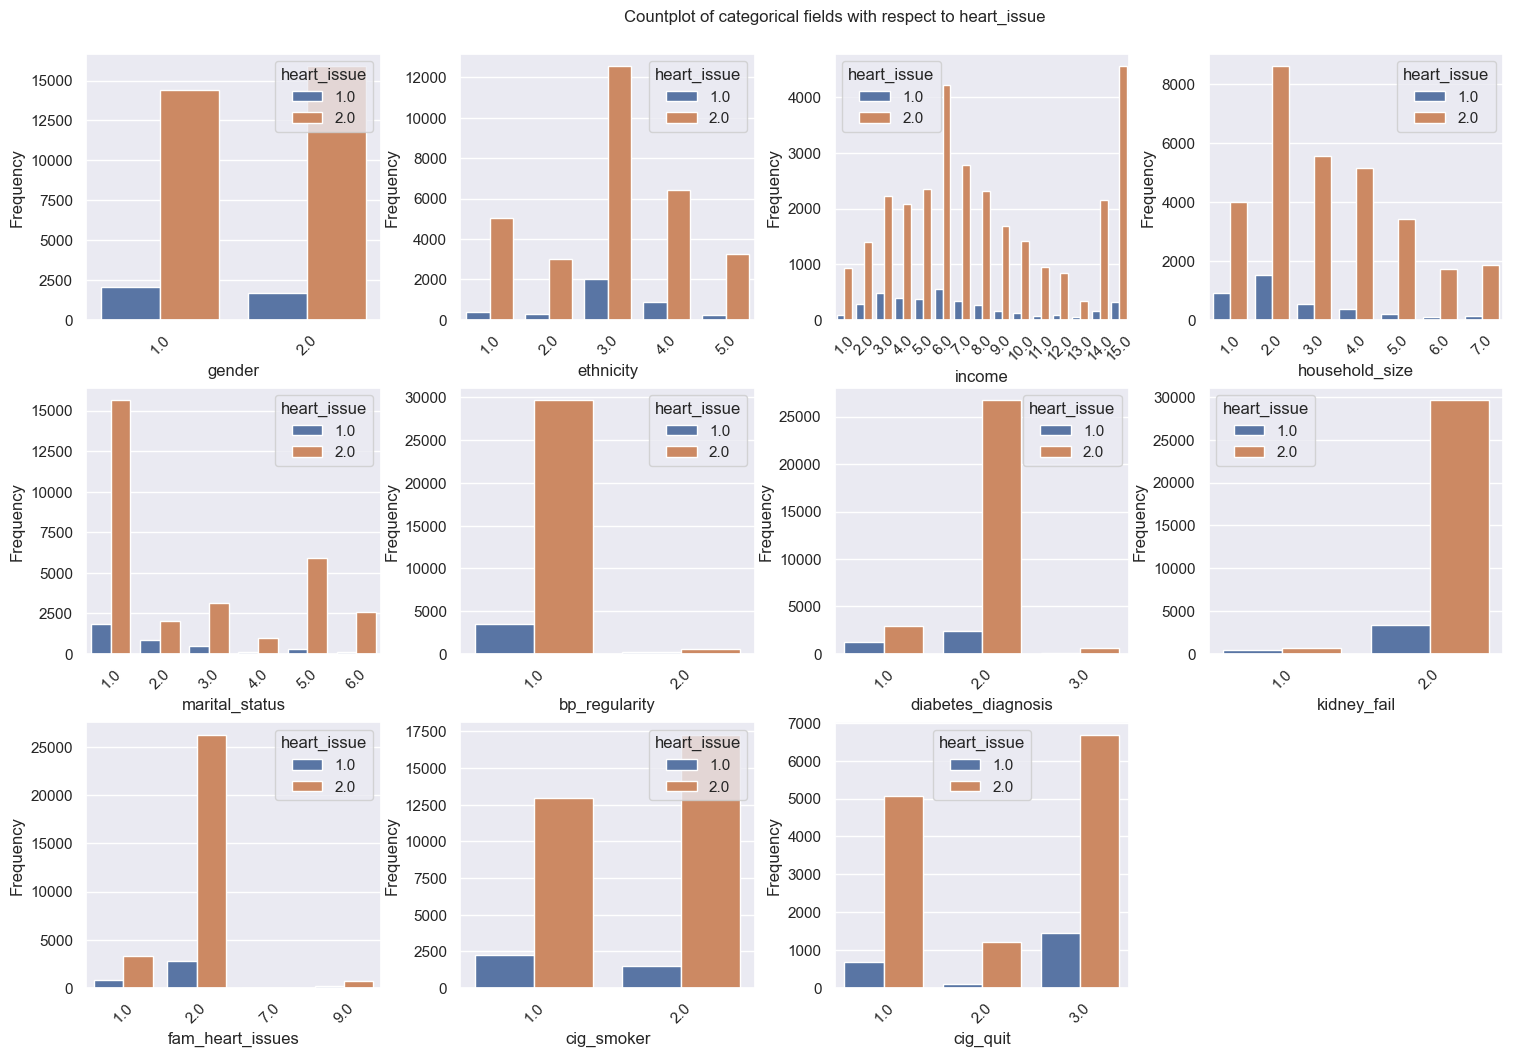

In [270]:
#let's look at count plot of our target feature with respect to all categorical features
plt.figure(figsize = (15,10))
for i in enumerate(categorical_features):
    plt.subplot(3, 4, i[0]+1)
    sns.countplot(x = i[1], data = df, palette = 'deep' , hue=df['heart_issue'])
    plt.tight_layout(pad=0.2)
    plt.gca().set(xlabel= i[1],ylabel='Frequency')
    plt.xticks(rotation = 45)
plt.title('Countplot of categorical fields with respect to heart_issue' , x=0, y=3.6) 

## Since heart_issue had most siginificant correlation with age we look at features that showed correaltion with age, and see how they change with age 

Text(0.5, 1.2, 'Relation between Age and Systolic BP (color depth indicates count of values)')

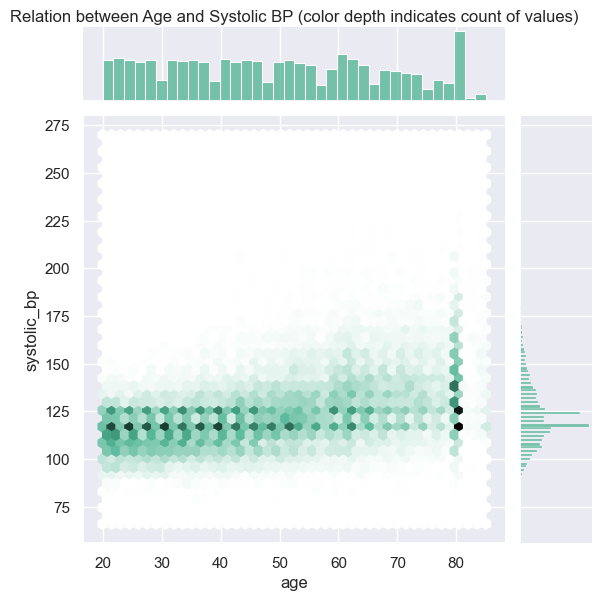

In [271]:
#let's look at nu
sns.jointplot(x=df['age'], y = df['systolic_bp'], data = df, kind='hex', color="#4CB391")
plt.title("Relation between Age and Systolic BP (color depth indicates count of values)", y=1.2)

The above hexabin again shows high numer of particpants around age 80, although it's intersting to note while the systolic bp range increase with age, most of values stay in common range around 120

Text(0.5, 3.75, 'Relation between Age and Household/ Marital Status/ Diabetes Diagnosis ')

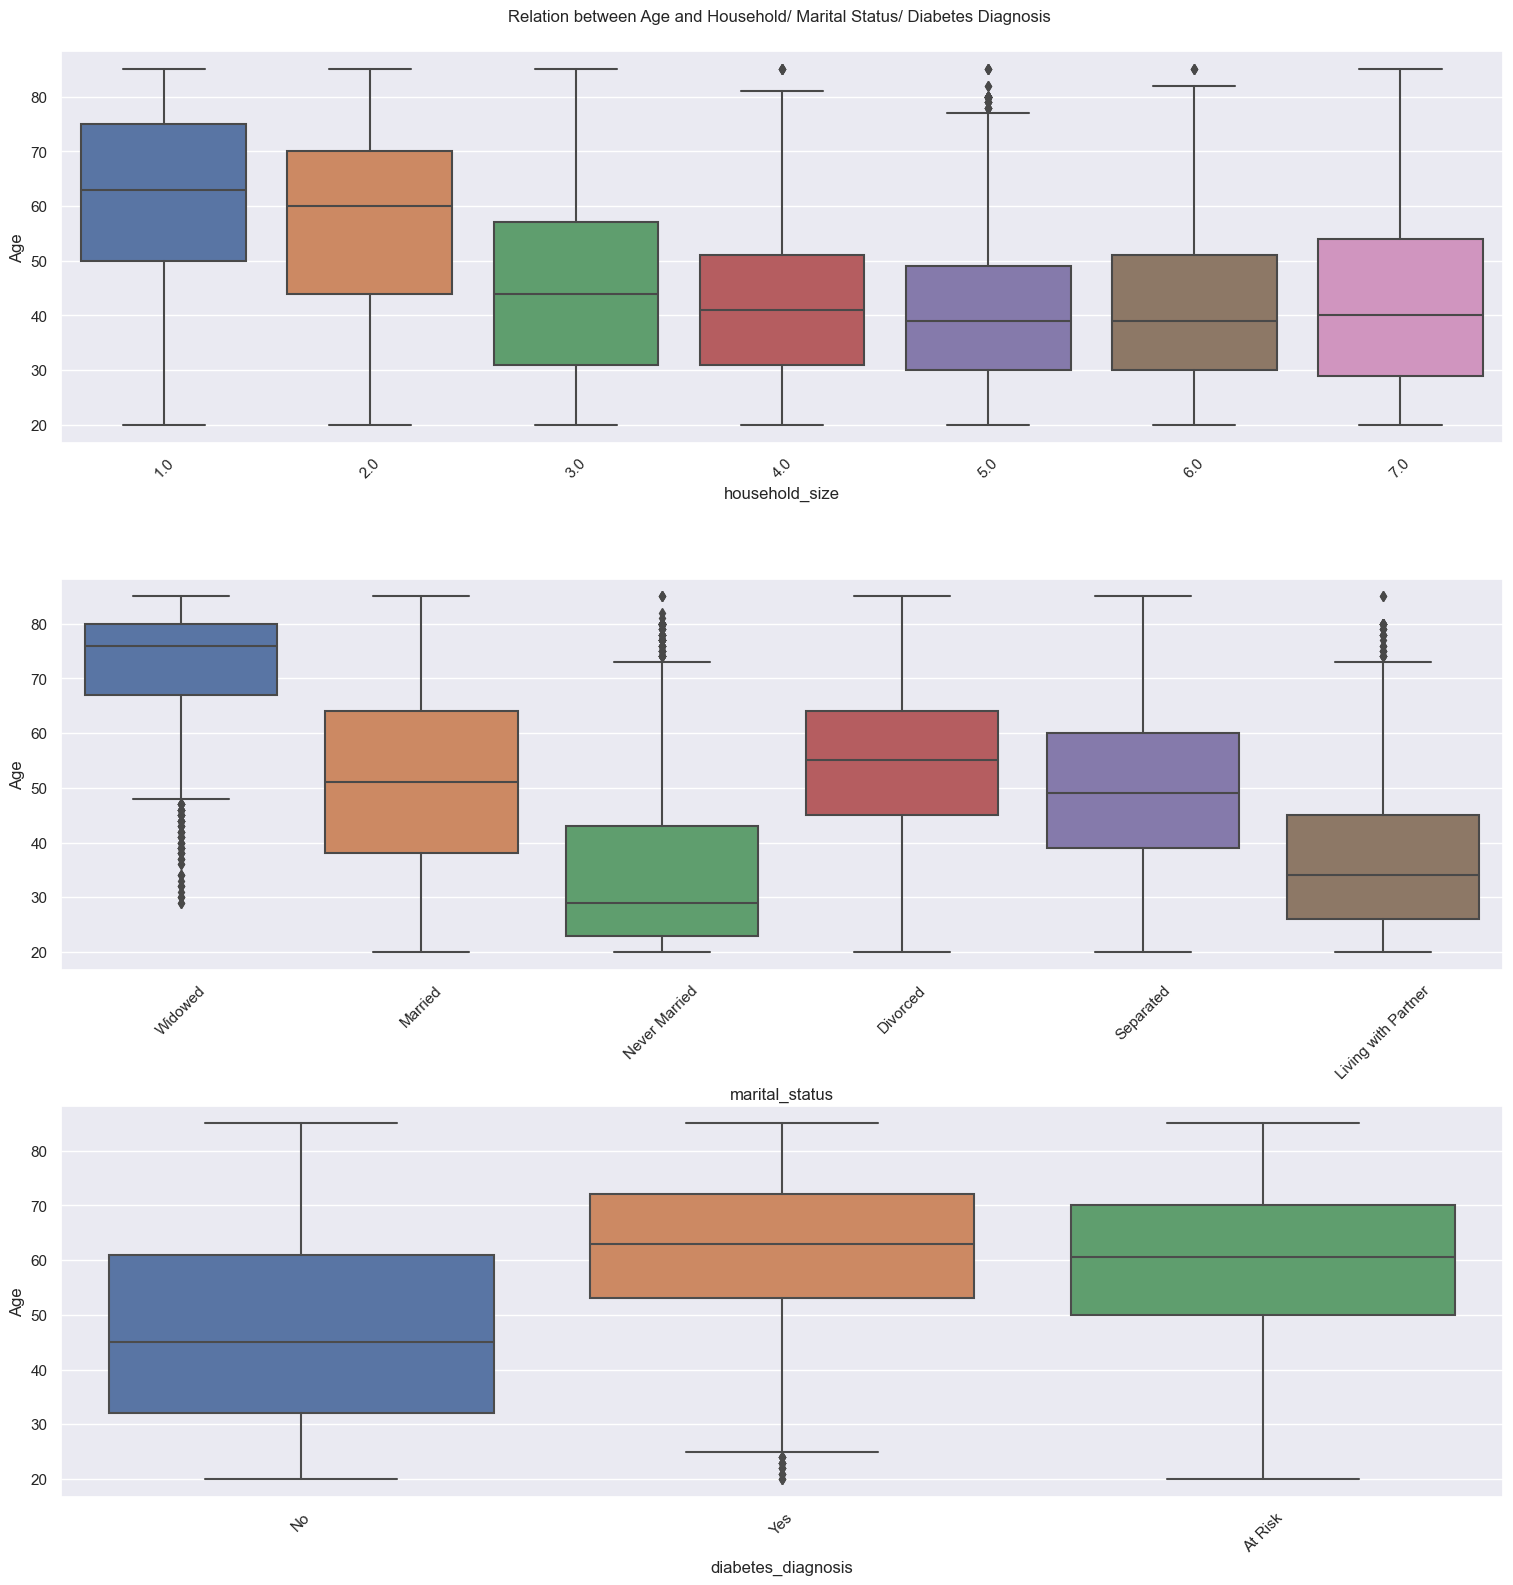

In [272]:
#let's look at count plot of our target feature with respect to all categorical features
temp = df.copy()
temp['marital_status'] = temp['marital_status'].replace([1.0,2.0,3.0,4.0,5.0,6.0],['Married','Widowed','Divorced','Separated','Never Married','Living with Partner'])
temp['diabetes_diagnosis'] = temp['diabetes_diagnosis'].replace([1.0,2.0,3.0],['Yes','No','At Risk'])

cols = ['household_size', 'marital_status', 'diabetes_diagnosis']
plt.figure(figsize = (15,15))
''
for i in enumerate(cols):
    plt.subplot(3, 1, i[0]+1)
    sns.boxplot(y=temp['age'], x=i[1], data = temp, palette = 'deep')
    plt.tight_layout(pad=0.2)
    plt.gca().set(xlabel= i[1],ylabel='Age')
    plt.xticks(rotation = 45)
plt.title("Relation between Age and Household/ Marital Status/ Diabetes Diagnosis ", y=3.75)   

Suprisingly the household size tends to be smaller for higher ages it might be that with age there are fewer dependents. Although it's hard to say why exactly the household size is smaller for higher ages. The next plot adds another reasoning

We see marital status of widowed being most common for higher ages (it does look like it's possible to make it to 80 regardless of marital status :))

In [273]:
#dropping body_fat and missing body_fat indicator columns due to high number of missing values
#with 56% percent missing values we didn't see enough reasons to keeep this less reliable feature
# plus the impact seems to be strongly linked to total cholestrol which had about 9% of values missing replaced by median

cvd=cvd.drop(columns=['body_fat', 'missing_body_fat_indicator'], axis=1)

In [274]:
#Confirming end data
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34022 entries, 0 to 34021
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  34022 non-null  float64
 1   age                     34022 non-null  float64
 2   ethnicity               34022 non-null  float64
 3   income                  34022 non-null  float64
 4   household_size          34022 non-null  float64
 5   marital_status          34022 non-null  float64
 6   bp_regularity           34022 non-null  float64
 7   systolic_bp             34022 non-null  float64
 8   diastolic_bp            34022 non-null  float64
 9   bmi                     34022 non-null  float64
 10  waist_size              34022 non-null  float64
 11  good_cholestrol         34022 non-null  float64
 12  total_cholestrol        34022 non-null  float64
 13  diabetes_diagnosis      34022 non-null  float64
 14  diabetes_diagnosis_age  34022 non-null

# Summary

Our target (column to predict) remains heart_issue plus we have 10 numerical features and 11 categorical features to help predict values.

The strongest correlation heart_issue has is with age. While age in extension did show correlation with a few other features, which we explored.

--
Our data set has 34,022 rows with 22 columns, and average age of participant is around ~50 years. We observed that fewer and fewer people have close to highest number of days since they stopped smoking, and majority of participants are around age 80.

As we started exploring categorical features we realized most common marital status is married, while most common ethnicity is non-hispanic white. 
When it comes to income most of the participants had income less than 35,000 USD, the only income bracket with more male than female gender was highest income bracket of 100k + USD

Finally we look at correlations, bmi and waist size had stong positive correlation. While body fat had a positive correlation with total cholesterol.

Heart issues had a positive correlation with age (1 being Yes, and 2 being No), we looked at heart issue considering all numerical features and categorical features. Plus we checked how age impacts factors like household size and marital status. 

In [275]:
# save the post EDA data as a csv file
datapath = '../Post EDA Data'
if not os.path.exists(datapath):
    os.mkdir(datapath)
datapath_cvd_data = os.path.join(datapath, 'cvd.csv')
if not os.path.exists(datapath_cvd_data):
    cvd.to_csv(datapath_cvd_data, index=False)

## Next Notebook in this Project: [03_Pre-processing_and_Training] Coming soon!